In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.colors

from matplotlib import animation, rc
from IPython.display import HTML

import numpy as np

# Adam GD
В данном notebook мы рассмотрим градиентный спуск Adam с помощью нашего фреймворка. Здесь будут рассмотрены статистики, что нас будут интересны для сравнения. Дальнейшим планом 

In [28]:
from gd import adam

In [29]:
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])

w_init = -6
b_init = 4.0

animation_frames = 20
algo = adam.Adam(w_init, b_init)

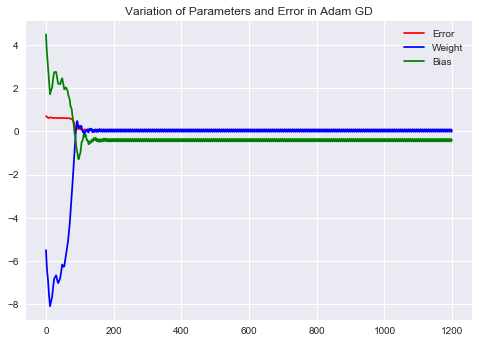

In [30]:
plt.style.use("seaborn")
algo.fit(X, Y, epochs=epochs, eta=eta)
plt.plot(algo.e_h, 'r')
plt.plot(algo.w_h, 'b')
plt.plot(algo.b_h, 'g')
plt.legend(["Error","Weight","Bias"])

plt.title("Variation of Parameters and Error in Adam GD")
plt.show()

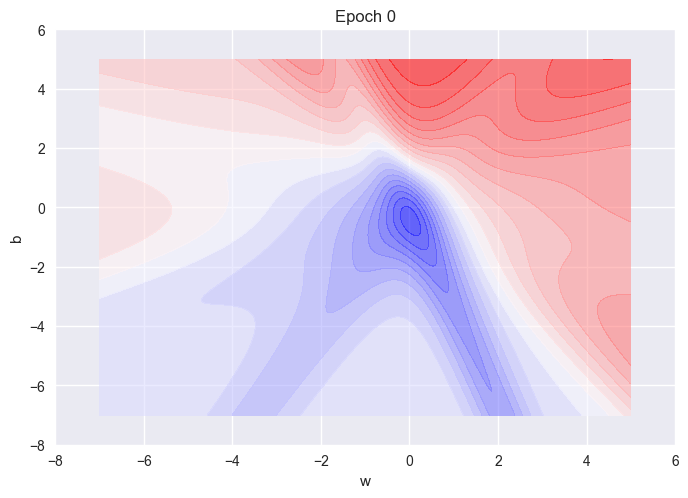

In [31]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = algo.error(X, Y, WW, BB)

fig = plt.figure(dpi=100)
ax = plt.subplot(111)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
title = ax.set_title('Epoch 0')
cset = plt.contourf(WW, BB, Z, 25, alpha=0.6, cmap=cm.bwr)
plt.show()

In [32]:
def plot_animate_2d(i):
    i = int(i*(epochs/animation_frames))
    line.set_data(algo.w_h[:i+1], algo.b_h[:i+1])
    title.set_text('Epoch: {: d}, Error: {:.4f}'.format(i, algo.e_h[i]))
    return line, title

In [33]:
i = 0
line, = ax.plot(algo.w_h[:i+1], algo.b_h[:i+1], color='black',marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_2d, frames=animation_frames)
rc('animation', html='jshtml')
anim